[colab](https://colab.research.google.com/drive/1LcSXLnn0WLDUz1EgJ_QNwWOtqShnsIpN#scrollTo=T2tHpTQ4LzNk)     

[github repository](https://github.com/sayan-neogy/S3N)

Mount the google drive if needed:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [3]:
!nvidia-smi

Mon Oct  9 09:57:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


## **Git Clone The Repository:**

In [76]:
%cd /content

/content


In [77]:
!git clone https://github.com/sayan-neogy/S3N.git

Cloning into 'S3N'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 246 (delta 48), reused 3 (delta 0), pack-reused 151
Receiving objects: 100% (246/246), 46.14 MiB | 27.23 MiB/s, done.
Resolving deltas: 100% (50/50), done.


##**Install Ulralytics, YOLOv8 and Other neccessary Dependencies**

In [6]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
import os
import numpy as np
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import os
import io
import glob
from IPython.display import Image, display


In [9]:
!pip install roboflow
!pip install ttach

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

## **Clone the EIGEN-CAM Software :**

In [34]:
%cd {HOME}
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

/content
Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 66 (delta 19), reused 42 (delta 6), pack-reused 0
Receiving objects: 100% (66/66), 16.87 MiB | 19.97 MiB/s, done.
Resolving deltas: 100% (19/19), done.


# **Define Functions**

In [89]:
# Define the function that takes two folder paths as arguments
def side_by_side(folder1, folder2):
    # Initialize some variables
    images1 = []  # List of image file names in folder1
    images2 = []  # List of image file names in folder2
    n = 0  # Number of images to print

    # Loop through the files in folder1
    for file_name in os.listdir(folder1):
        # If the file is an image, append it to the list
        if file_name.endswith((".jpg", ".png", ".bmp")):
            images1.append(file_name)

    # Loop through the files in folder2
    for file_name in os.listdir(folder2):
        # If the file is an image, append it to the list
        if file_name.endswith((".jpg", ".png", ".bmp")):
            images2.append(file_name)

    # Find the minimum number of images in both folders
    n = min(len(images1), len(images2))

    # Create a figure with n rows and 2 columns of subplots
    fig, axes = plt.subplots(n, 2, figsize=(6, n*5))
    # Adjust the spacing between the subplots
    fig.tight_layout()
    # Loop through the rows
    for i in range(n):
        # Read the image from folder1 and plot it on the left subplot
        img1 = plt.imread(os.path.join(folder1, images1[i]))
        axes[i][0].imshow(img1)
        # Set the title of the left subplot as the file name of the image
        axes[i][0].set_title(images1[i])
        # Remove the ticks and labels from the left subplot axes
        axes[i][0].set_xticks([])
        axes[i][0].set_yticks([])

        # Read the image from folder2 and plot it on the right subplot
        img2 = plt.imread(os.path.join(folder2, images2[i]))
        axes[i][1].imshow(img2)
        # Set the title of the right subplot as the file name of the image
        axes[i][1].set_title(images2[i])
        # Remove the ticks and labels from the right subplot axes
        axes[i][1].set_xticks([])
        axes[i][1].set_yticks([])

    # Show the figure
    plt.show()

**Function to remake the dataset folder to our specific folder structure**

In [10]:
def move_images_to_images_folder(input_folder):
    # Create the "images" folder inside the input folder
    images_folder = os.path.join(input_folder, "1")
    os.makedirs(images_folder, exist_ok=True)

    # Iterate through files in the input folder
    for filename in os.listdir(input_folder):
        file_path = os.path.join(input_folder, filename)

        # Check if the file is a regular file (not a directory)
        if os.path.isfile(file_path):
            # Move the file to the "images" folder
            shutil.move(file_path, os.path.join(images_folder, filename))

**Function to make sure all the files are homogenous in nature, i.e. , we convert all the images to .jpg format :**

In [27]:
def rename_image_files_homgenous(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file in files:
        if "." in file:
            # Split the filename using "." as the separator
            name_parts = file.split(".")
            if len(name_parts) == 2:
                # Extract the actual name and add '.jpg' to the end
                new_name = name_parts[0] + ".jpg"
                # Create the new absolute path for the file
                old_path = os.path.join(folder_path, file)
                new_path = os.path.join(folder_path, new_name)
                # Rename the file
                os.rename(old_path, new_path)
                print(f"Renamed: {file} -> {new_name}")

**Function to trim the image names in the excel files :**

In [12]:
def trim_image_names_inplace(input_excel_file):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(input_excel_file)

    # Modify the "Image Name" column in place by trimming it
    df["Image Name"] = df["Image Name"].str.split("_").str[0]

    # Save the modified DataFrame back to the same Excel file
    df.to_excel(input_excel_file, index=False)

**Function for removing roboflow IDs from the images in dataset:**

In [13]:
def rename_image_files(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file in files:
        if "." in file:
            # Split the filename using ".rf." as the separator
            name_parts = file.split(".rf.")
            if len(name_parts) == 2:
                # Extract the actual name and add '.jpg' to the end
                new_name = name_parts[0] + ".jpg"
                # Create the new absolute path for the file
                old_path = os.path.join(folder_path, file)
                new_path = os.path.join(folder_path, new_name)
                # Rename the file
                os.rename(old_path, new_path)
                print(f"Renamed: {file} -> {new_name}")

**Function for removing roboflow IDs from the labels in dataset:**

In [14]:
def rename_label_files(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file in files:
        if "." in file:
            # Split the filename using ".rf." as the separator
            name_parts = file.split(".rf.")
            if len(name_parts) == 2:
                # Extract the actual name and add '.jpg' to the end
                new_name = name_parts[0] + ".txt"
                # Create the new absolute path for the file
                old_path = os.path.join(folder_path, file)
                new_path = os.path.join(folder_path, new_name)
                # Rename the file
                os.rename(old_path, new_path)
                print(f"Renamed: {file} -> {new_name}")

**function to classify images and store results in an Excel sheet**

In [15]:
# Define a function to classify images and store results in an Excel sheet
def classify_and_store_results(model, test_directory, output_excel_file):
    # Create an ImageDataGenerator for loading and preprocessing test images
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # You may need to adjust preprocessing steps

    # Load and preprocess test images from the test directory
    test_generator = test_datagen.flow_from_directory(
        test_directory,
        target_size=(224, 224),  # Adjust the target size to match your model's input size
        batch_size=1,
        shuffle=False,
        class_mode=None
    )

    # Make predictions on the test images
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

    # Get the image names from the generator
    image_names = [os.path.basename(image_path) for image_path in test_generator.filenames]
    # Get the predicted class labels based on the highest probability
    predicted_labels = ["Non-Bleeding" if prediction[1] > prediction[0] else "Bleeding" for prediction in predictions]

    print(predicted_labels)
    # Create a DataFrame to store results
    results_df = pd.DataFrame({'Image Name': image_names, 'Predicted Label': predicted_labels})

    # Save the results to an Excel file
    results_df.to_excel(output_excel_file, index=False)

    # Create folders for Bleeding and Non-Bleeding images
    bleeding_folder = os.path.join(f"{HOME}/classified", "Bleeding_set")
    non_bleeding_folder = os.path.join(f"{HOME}/classified", "Non-Bleeding_set")

    %rm -r {HOME}classified/*
    # Create the folders if they don't exist
    os.makedirs(bleeding_folder, exist_ok=True)
    os.makedirs(non_bleeding_folder, exist_ok=True)

    for image_name, predicted_label in zip(image_names, predicted_labels):
        source_path = os.path.join(test_directory,"1", image_name)
        if predicted_label == "Bleeding":
            destination_path = os.path.join(bleeding_folder, image_name)
        else:
            destination_path = os.path.join(non_bleeding_folder, image_name)

        print(f"Cloning: {source_path} -> {destination_path}")

        # Verify file existence before moving
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
        else:
            print(f"Source file not found: {source_path}")
            # If the source file is not found, move it to the "Non-Bleeding" folder
            shutil.copy(destination_path, source_path)

    return bleeding_folder


**function to extract YOLO labels and confidence from .txt label files and update the Excel file**

In [16]:
# Define a function to extract YOLO labels and confidence from .txt files and update the Excel file
def update_excel_with_yolo_labels(excel_file, yolo_labels_dir):
    # Read the existing Excel file
    results_df = pd.read_excel(excel_file)

    new_rows = []  # To store new rows to be added to the DataFrame

    # Iterate over the rows in the DataFrame
    for index, row in results_df.iterrows():
        image_name = row['Image Name']
        predicted_label = row['Predicted Label']

        # Check if the image was classified as "Bleeding"
        if predicted_label == "Bleeding":
            # Construct the path to the corresponding YOLO label file
            yolo_label_file = os.path.join(yolo_labels_dir, image_name.replace('.jpg', '.txt'))

            # Check if the YOLO label file exists
            if os.path.isfile(yolo_label_file):
                with open(yolo_label_file, 'r') as f:
                    lines = f.readlines()

                # Extract YOLO label information
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) == 6:
                        class_id, x_center, y_center, width, height, confidence = parts
                        yolo_labels = {
                            'Image Name': image_name,
                            'X_Center': float(x_center),
                            'Y_Center': float(y_center),
                            'Width': float(width),
                            'Height': float(height),
                            'Confidence': float(confidence)
                        }
                        new_rows.append(yolo_labels)

    # Create a DataFrame from the new rows
    yolo_labels_df = pd.DataFrame(new_rows)

    # Merge the original DataFrame with the new DataFrame based on the 'Image Name' column
    merged_df = pd.merge(results_df, yolo_labels_df, on='Image Name', how='left')

    # Save the merged DataFrame back to the Excel file
    merged_df.to_excel(excel_file, index=False)


**Function to generate Eigen-CAM for an image**

In [17]:
# Function to generate Eigen-CAM for an image
def generate_eigen_cam_for_image(model, image_path, target_layers):
    # Load and preprocess the image
    plt.rcParams["figure.figsize"] = [3.0, 3.0]
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    # Create Eigen-CAM object
    cam = EigenCAM(model, target_layers, task='od')

    # Generate Eigen-CAM
    grayscale_cam = cam(rgb_img)[0, :, :]

    # Overlay Eigen-CAM on the original image
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    return cam_image


**Function to generate Eigen-CAM for a folder of images**

In [18]:
# Function to generate Eigen-CAM for a folder of images
def generate_eigen_cam_for_folder(model, input_folder, output_folder, target_layers):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of image file paths in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)

        # Generate Eigen-CAM for the image
        cam_image = generate_eigen_cam_for_image(model, image_path, target_layers)

        # Save the CAM image to the output folder with the same name
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, cam_image)

# **Visualize the present images in the repository to compare Prediction and Eigen CAM:**

**lets compare the to validation set images:**

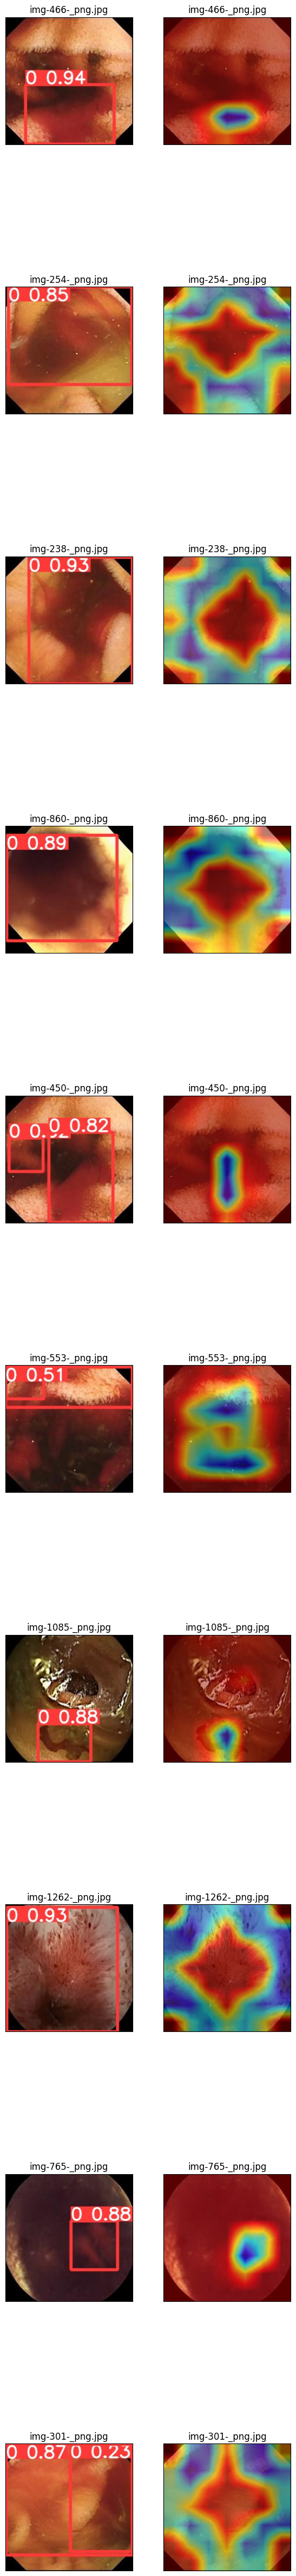

In [ ]:
folder1='/content/S3N/images/validation_set'
folder2='/content/S3N/interpretability_plot_eigen_cam/validation_set'
side_by_side(folder1, folder2)

**lets compare the to test dataset 1 images:**

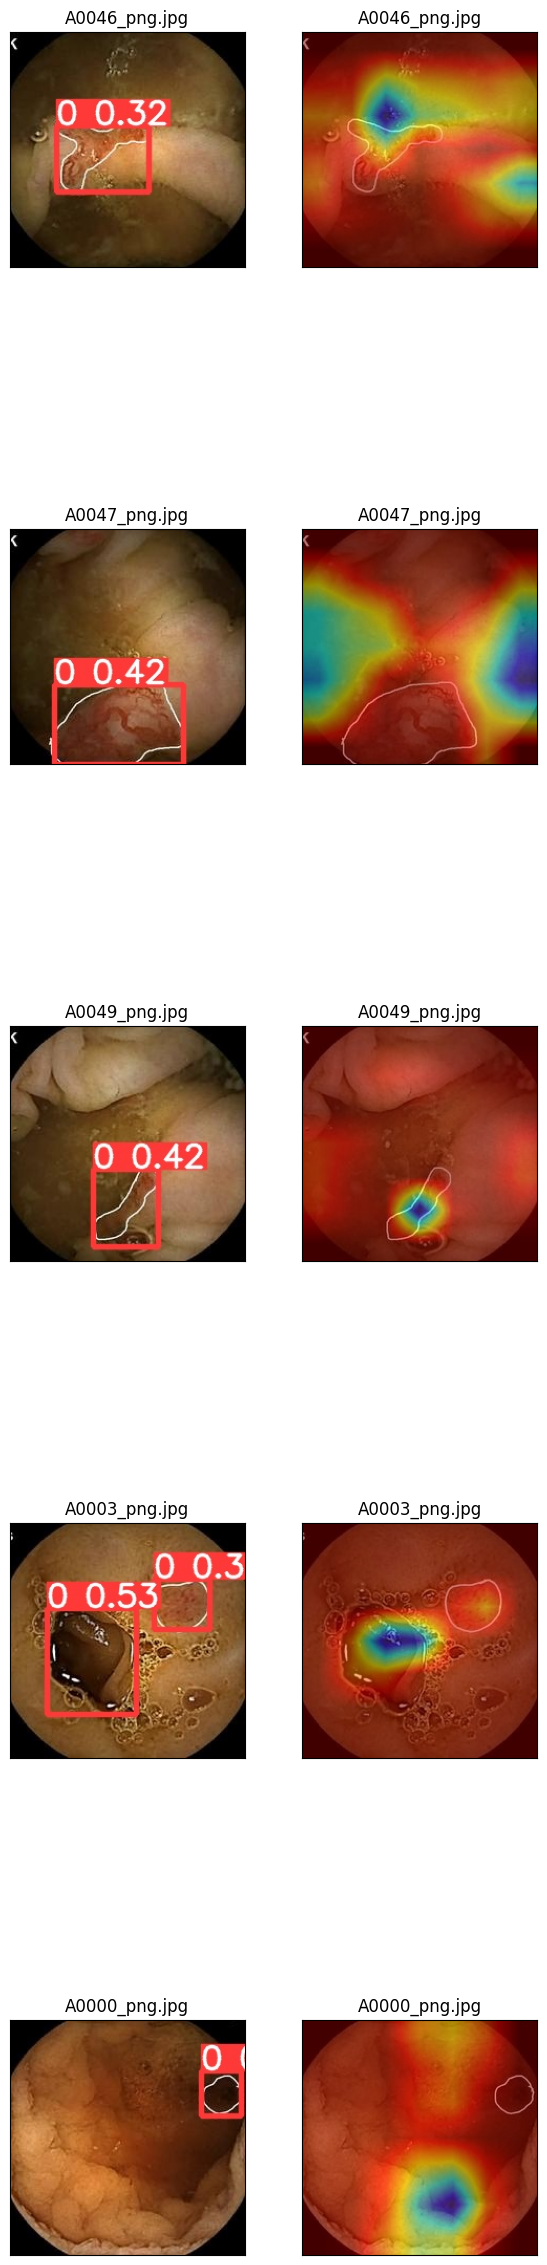

In [ ]:
folder1='/content/S3N/images/test_dataset_1'
folder2='/content/S3N/interpretability_plot_eigen_cam/test_dataset_1'
side_by_side(folder1, folder2)

**lets compare the to test dataset 2 images:**

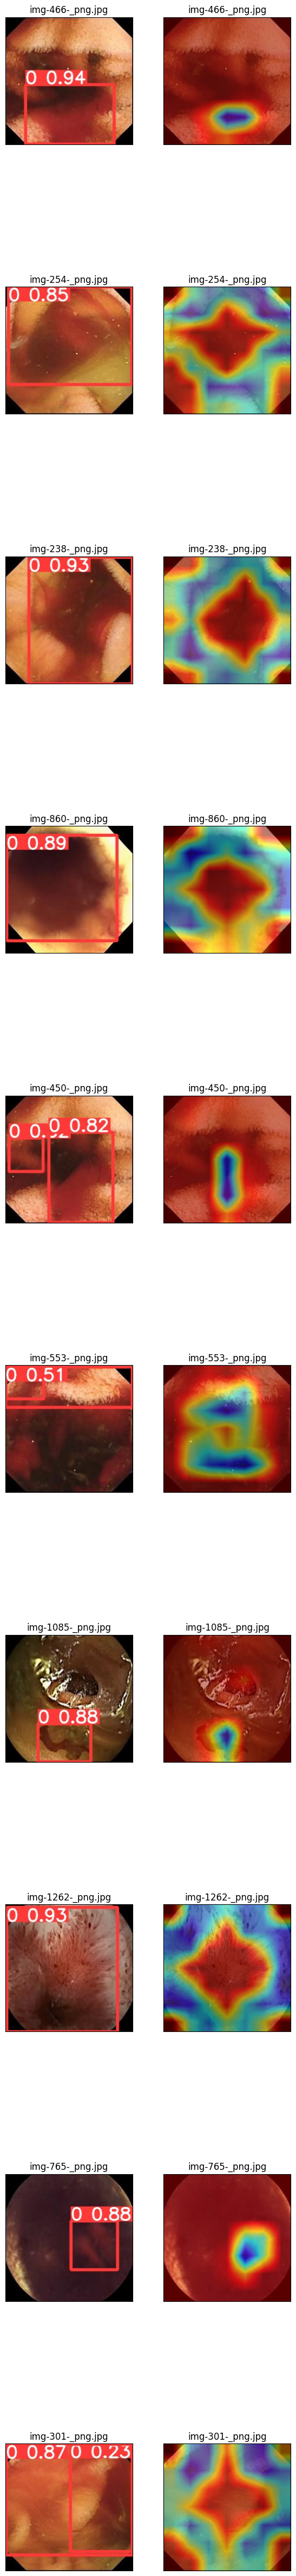

In [ ]:
folder1='/content/S3N/images/validation_set'
folder2='/content/S3N/interpretability_plot_eigen_cam/validation_set'
side_by_side(folder1, folder2)

# **Input your own Dataset Here:**

In [19]:
%cd {HOME}

/content


In [51]:
!gdown https://drive.google.com/uc?id=10VjZ5ScyKDh3wxbVJ5G8SAKOtCspg9PI

Downloading...
From: https://drive.google.com/uc?id=10VjZ5ScyKDh3wxbVJ5G8SAKOtCspg9PI
To: /content/Auto-WCEBleedGen Challenge Test Dataset.zip
100% 42.9M/42.9M [00:01<00:00, 24.9MB/s]


In [54]:
!unzip "Auto-WCEBleedGen Challenge Test Dataset.zip"

Archive:  Auto-WCEBleedGen Challenge Test Dataset.zip
   creating: Auto-WCEBleedGen Challenge Test Dataset/
   creating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0001.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0031.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0014.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0010.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0006.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0007.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0029.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0044.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0048.png  
  inflating: Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1/A0005.png  
  inflating: Auto-WCEBl

**Get the folder into the desired structure:**


**Folder Structure Example:**

>     Test_dataset_n-1:
                      1:
                        img_1.jpg
                        img_2.jpg
                        img_3.jpg

In [55]:
input_folder = "/content/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1" #put the path to you dataset image folder
input_folder_2 = "/content/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 2" #put the path to you dataset image folder


move_images_to_images_folder(input_folder)
move_images_to_images_folder(input_folder_2)

**convert all the images to .jpg to make sure all the images are of homogenous nature:**

In [57]:
# Provide the folder path here
folder_path = os.path.join(f"{input_folder}/1")
rename_image_files_homgenous(folder_path)
folder_path = os.path.join(f"{input_folder_2}/1")
rename_image_files_homgenous(folder_path)

Renamed: A0044.jpg -> A0044.jpg
Renamed: A0002.jpg -> A0002.jpg
Renamed: A0037.jpg -> A0037.jpg
Renamed: A0020.jpg -> A0020.jpg
Renamed: A0029.jpg -> A0029.jpg
Renamed: A0035.jpg -> A0035.jpg
Renamed: A0012.jpg -> A0012.jpg
Renamed: A0028.jpg -> A0028.jpg
Renamed: A0024.jpg -> A0024.jpg
Renamed: A0032.jpg -> A0032.jpg
Renamed: A0023.jpg -> A0023.jpg
Renamed: A0022.jpg -> A0022.jpg
Renamed: A0026.jpg -> A0026.jpg
Renamed: A0000.jpg -> A0000.jpg
Renamed: A0040.jpg -> A0040.jpg
Renamed: A0013.jpg -> A0013.jpg
Renamed: A0046.jpg -> A0046.jpg
Renamed: A0042.jpg -> A0042.jpg
Renamed: A0048.jpg -> A0048.jpg
Renamed: A0011.jpg -> A0011.jpg
Renamed: A0045.jpg -> A0045.jpg
Renamed: A0041.jpg -> A0041.jpg
Renamed: A0003.jpg -> A0003.jpg
Renamed: A0043.jpg -> A0043.jpg
Renamed: A0019.jpg -> A0019.jpg
Renamed: A0033.jpg -> A0033.jpg
Renamed: A0039.jpg -> A0039.jpg
Renamed: A0021.jpg -> A0021.jpg
Renamed: A0036.jpg -> A0036.jpg
Renamed: A0001.jpg -> A0001.jpg
Renamed: A0009.jpg -> A0009.jpg
Renamed:

# **Testing on Test Dataset 1**

In [42]:
%cd {HOME}

/content


In [29]:
%rm -r {HOME}/S3N/excel/*

In [30]:

if __name__ == "__main__":
    # Load your trained model
    model = tf.keras.models.load_model('S3N/weights/model_cls.h5')  # Replace with your classification model file

    # Specify the directory containing test images
    test_directory = input_folder # Replace with your test image directory
    #%mkdir -p excel
    # Specify the name of the output Excel file
    output_excel_file = 'S3N/excel/test-1.xlsx'  # Change this to your desired output file name

    # Call the function to classify images and store results in Excel
    path=classify_and_store_results(model, test_directory, output_excel_file)

    %cp S3N/excel/test-1.xlsx S3N/excel/test-1_with_yolo_bbox.xlsx

    #detect with yolo model on the classified bleeding folder
    %cd {HOME}
    %rm -r runs/detect/predict #delete preexisting unnecessary folder
    !yolo task=detect mode=predict model=S3N/weights/best.pt conf=0.25 source={path} save=True save_txt=True save_conf=True nms=True agnostic_nms=True

    yolo_labels_dir = 'runs/detect/predict/labels'  # Replace with the directory containing YOLO label files
    output_excel_file = 'S3N/excel/test-1_with_yolo_bbox.xlsx'

    # Call the function to update the Excel file with YOLO labels
    update_excel_with_yolo_labels(output_excel_file, yolo_labels_dir)

    print(f"YOLO labels updated in {output_excel_file}")
    print("Results stored in", output_excel_file)


Found 49 images belonging to 1 classes.
49/49 [==============================] - 2s 10ms/step
['Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding']
rm: cannot remove '/contentclassified/*': No such file or directory
Cloning: /content/Auto-WCEBleedGen_Challenge_Test_Dataset/Test_Dataset_1/1/A0000.jpg -> /content/classified/Bleeding_set/A0000.jpg
Cloning: /content/Auto-WCEBleedGen_Challenge_Test_Dataset/Test_Dataset_1/1/A0001.jpg -> /content/classified/Bleeding_s

**Trim the Image Names in Excel files:**

In [31]:
input_excel_file = "S3N/excel/test-1.xlsx"  #input Excel file path
trim_image_names_inplace(input_excel_file)

input_excel_file = "S3N/excel/test-1_with_yolo_bbox.xlsx"  #input Excel file path
trim_image_names_inplace(input_excel_file)

## **Generate Eigen-CAM on a folder:**

In [35]:
%cd {HOME}/YOLO-V8-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

/content/YOLO-V8-CAM


In [37]:
# Load your trained model
model = YOLO(f'{HOME}/S3N/weights/best.pt')

# Specify the input and output folders
input_folder = os.path.join(f'{path}')   # Replace with your input image folder
output_folder =f'{HOME}/S3N/interpretability_plot_eigen_cam/test_dataset_1'  # Replace with your output image folder

# Specify the target layers for Eigen-CAM
target_layers = [model.model.model[-2]]

# Generate Eigen-CAM for the folder of images and save them
generate_eigen_cam_for_folder(model, input_folder, output_folder, target_layers)
print("Eigen-CAM images saved in", output_folder)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


Eigen-CAM images saved in /content/S3N/interpretability_plot_eigen_cam/test_dataset_1


**Visualize a few of the Eigen-Cam Images from the output folder:**

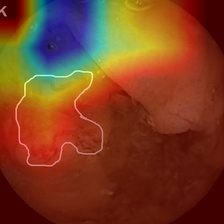

A0044.jpg 
 


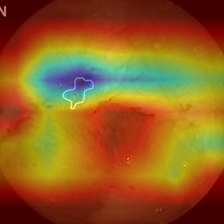

A0004_png.jpg 
 


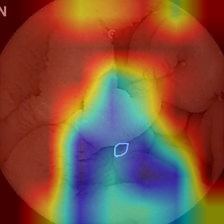

A0018_png.jpg 
 


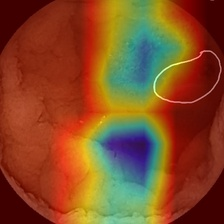

A0002.jpg 
 


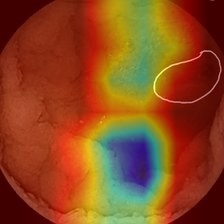

A0002_png.jpg 
 


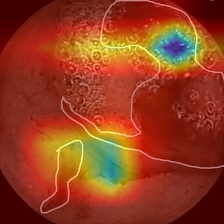

A0037.jpg 
 


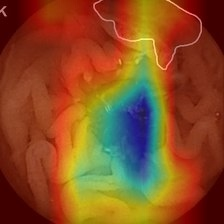

A0008_png.jpg 
 


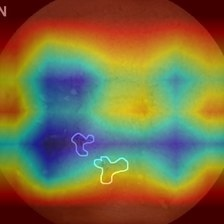

A0005_png.jpg 
 


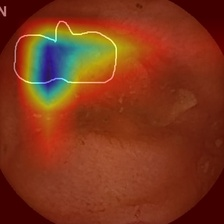

A0020.jpg 
 


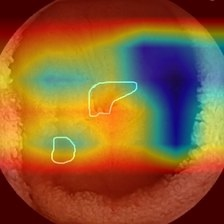

A0033_png.jpg 
 


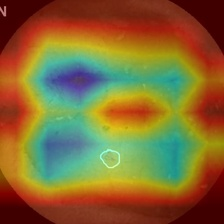

A0029.jpg 
 


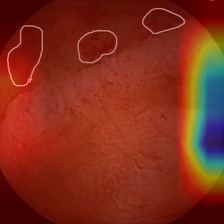

A0035.jpg 
 


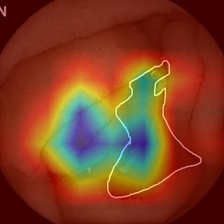

A0012.jpg 
 


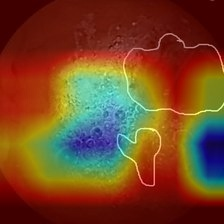

A0040_png.jpg 
 


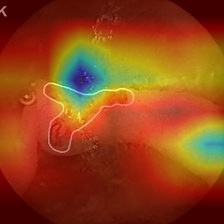

A0046_png.jpg 
 


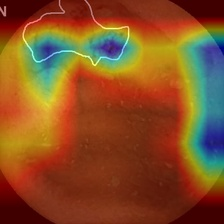

A0028.jpg 
 


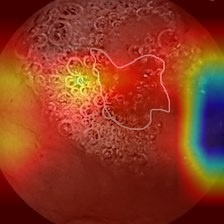

A0038_png.jpg 
 


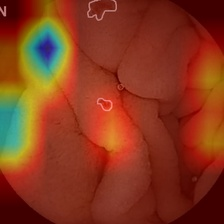

A0024.jpg 
 


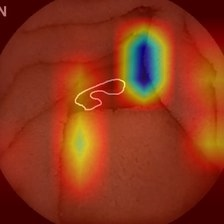

A0014_png.jpg 
 


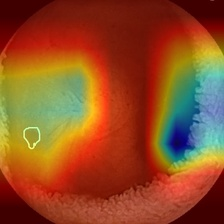

A0032.jpg 
 


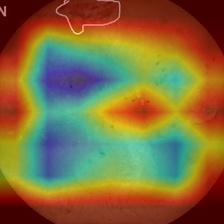

A0023.jpg 
 


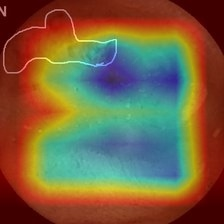

A0021_png.jpg 
 


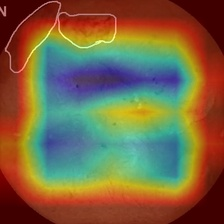

A0022.jpg 
 


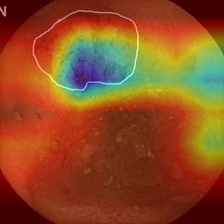

A0026.jpg 
 


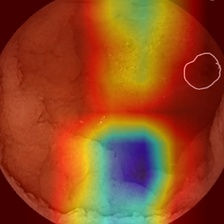

A0000.jpg 
 


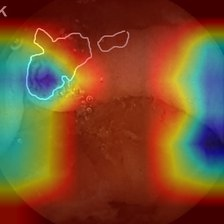

A0045_png.jpg 
 


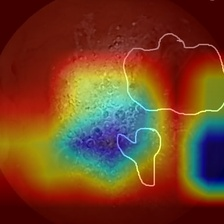

A0040.jpg 
 


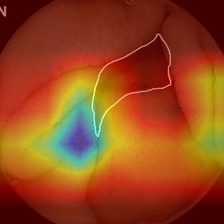

A0013.jpg 
 


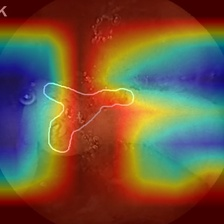

A0046.jpg 
 


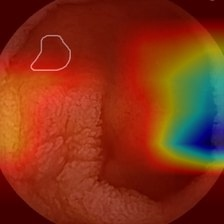

A0034_png.jpg 
 


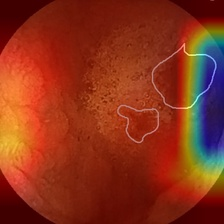

A0042.jpg 
 


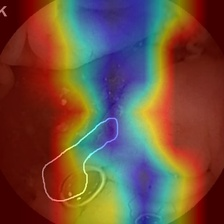

A0048.jpg 
 


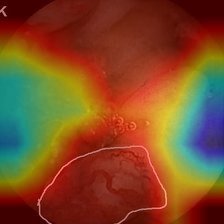

A0047_png.jpg 
 


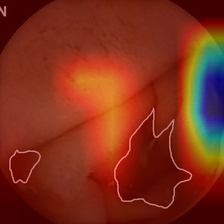

A0011.jpg 
 


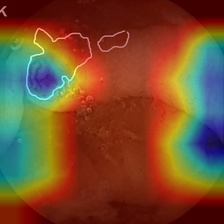

A0045.jpg 
 


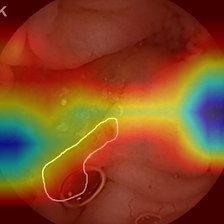

A0048_png.jpg 
 


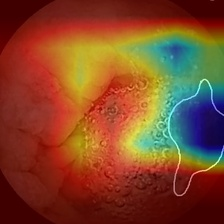

A0041.jpg 
 


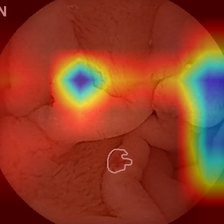

A0017_png.jpg 
 


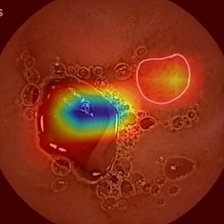

A0003.jpg 
 


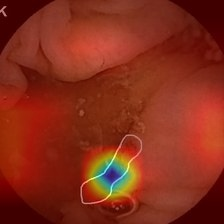

A0049_png.jpg 
 


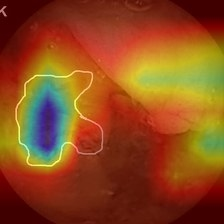

A0044_png.jpg 
 


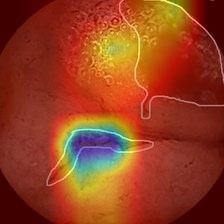

A0036_png.jpg 
 


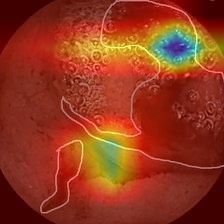

A0037_png.jpg 
 


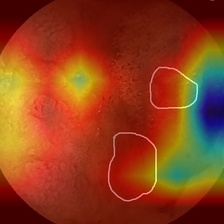

A0043.jpg 
 


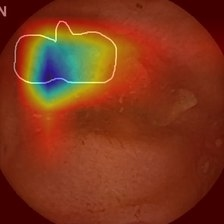

A0020_png.jpg 
 


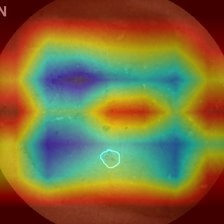

A0029_png.jpg 
 


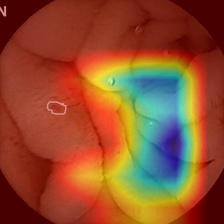

A0019.jpg 
 


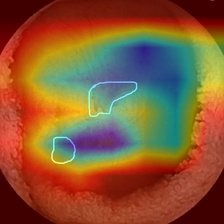

A0033.jpg 
 


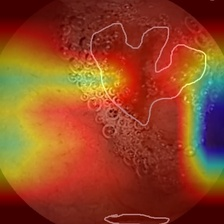

A0039.jpg 
 


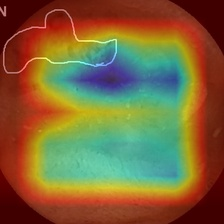

A0021.jpg 
 


In [39]:
for image_path in glob.glob(f'{output_folder}/*.jpg')[:50]:
      display(Image(filename=image_path, width=200))
      # Extract and print the image name
      image_name = os.path.basename(image_path)
      print(f"{image_name} \n ")

# **Testing on Test Dataset 2**

In [58]:
%cd {HOME}

/content


In [66]:
if __name__ == "__main__":
    # Load your trained model
    model = tf.keras.models.load_model('S3N/weights/model_cls.h5')  # Replace with your classification model file

    # Specify the directory containing test images
    test_directory = input_folder_2 # Replace with your test image directory
    #%mkdir -p excel
    # Specify the name of the output Excel file
    output_excel_file = 'S3N/excel/test-2.xlsx'  # Change this to your desired output file name

    # Call the function to classify images and store results in Excel
    path=classify_and_store_results(model, test_directory, output_excel_file)

    %cp S3N/excel/test-2.xlsx S3N/excel/test-2_with_yolo_bbox.xlsx

    #detect with yolo model on the classified bleeding folder
    %cd {HOME}
    %rm -r runs/detect/predict #delete preexisting unnecessary folder
    !yolo task=detect mode=predict model=S3N/weights/best.pt conf=0.15 source={path} save=True save_txt=True save_conf=True nms=True agnostic_nms=True

    yolo_labels_dir = 'runs/detect/predict/labels'  # Replace with the directory containing YOLO label files
    output_excel_file = 'S3N/excel/test-2_with_yolo_bbox.xlsx'

    # Call the function to update the Excel file with YOLO labels
    update_excel_with_yolo_labels(output_excel_file, yolo_labels_dir)

    print(f"YOLO labels updated in {output_excel_file}")
    print("Results stored in", output_excel_file)


Found 515 images belonging to 1 classes.
515/515 [==============================] - 8s 13ms/step
['Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'Bleeding', 'B

**Trim the Image Names in Excel files:**

In [67]:
input_excel_file = "S3N/excel/test-2.xlsx"  #input Excel file path
trim_image_names_inplace(input_excel_file)

input_excel_file = "S3N/excel/test-2_with_yolo_bbox.xlsx"  #input Excel file path
trim_image_names_inplace(input_excel_file)

## **Generate Eigen-CAM on a folder:**

In [68]:
%cd {HOME}/YOLO-V8-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

/content/YOLO-V8-CAM


In [69]:
# Load your trained model
model = YOLO(f'{HOME}/S3N/weights/best.pt')

# Specify the input and output folders
input_folder = os.path.join(f'{path}')   # Replace with your input image folder
output_folder =f'{HOME}/S3N/interpretability_plot_eigen_cam/test_dataset_2'  # Replace with your output image folder

# Specify the target layers for Eigen-CAM
target_layers = [model.model.model[-2]]

# Generate Eigen-CAM for the folder of images and save them
generate_eigen_cam_for_folder(model, input_folder, output_folder, target_layers)
print("Eigen-CAM images saved in", output_folder)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


Eigen-CAM images saved in /content/S3N/interpretability_plot_eigen_cam/test_dataset_2


**Visualize a few of the Eigen-Cam Images from the output folder:**

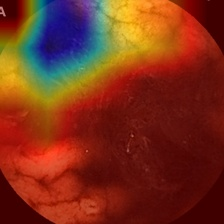

A0277.jpg 
 


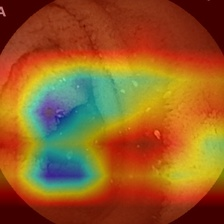

A0278.jpg 
 


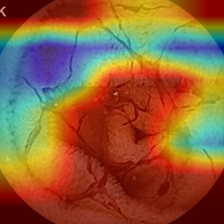

A0497.jpg 
 


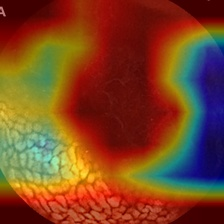

A0154.jpg 
 


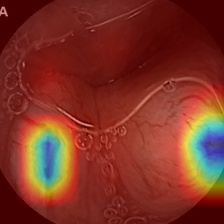

A0060.jpg 
 


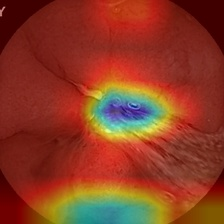

A0554.jpg 
 


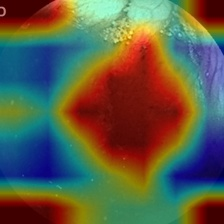

A0369.jpg 
 


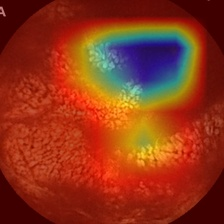

A0256.jpg 
 


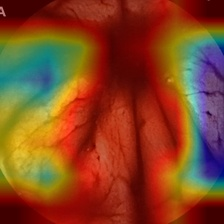

A0193.jpg 
 


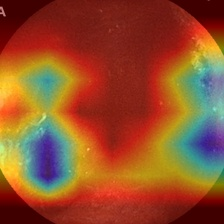

A0150.jpg 
 


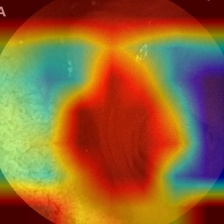

A0286.jpg 
 


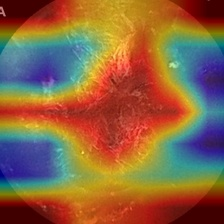

A0164.jpg 
 


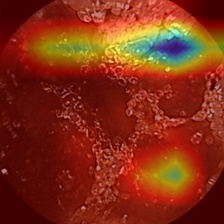

A0410.jpg 
 


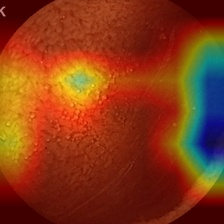

A0525.jpg 
 


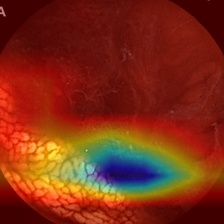

A0157.jpg 
 


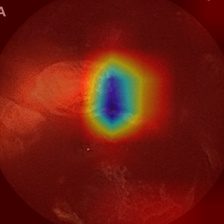

A0273.jpg 
 


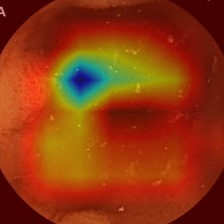

A0124.jpg 
 


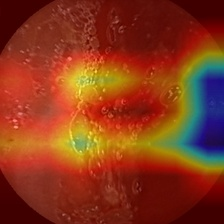

A0393.jpg 
 


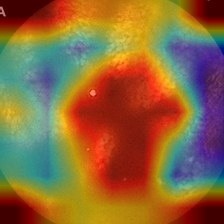

A0259_png.jpg 
 


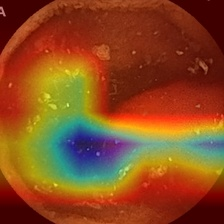

A0129.jpg 
 


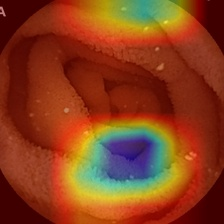

A0215.jpg 
 


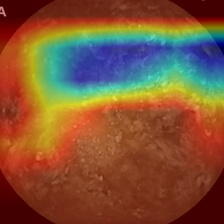

A0308.jpg 
 


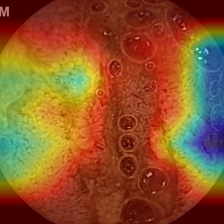

A0535.jpg 
 


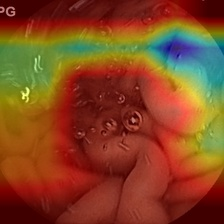

A0442.jpg 
 


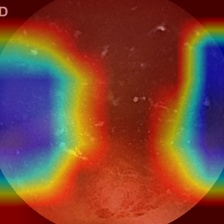

A0425.jpg 
 


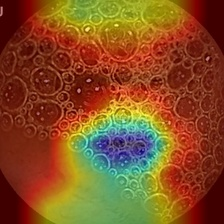

A0488.jpg 
 


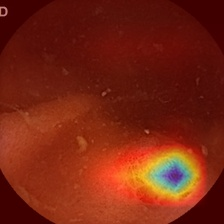

A0427.jpg 
 


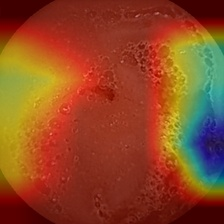

A0401.jpg 
 


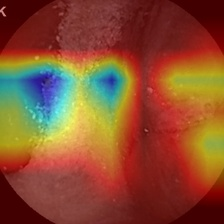

A0495.jpg 
 


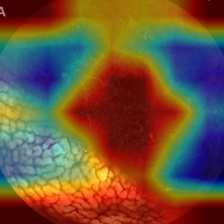

A0156.jpg 
 


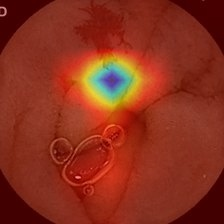

A0375_png.jpg 
 


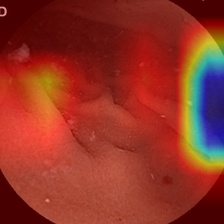

A0372.jpg 
 


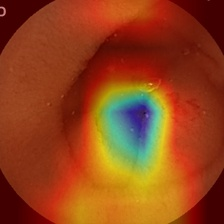

A0336.jpg 
 


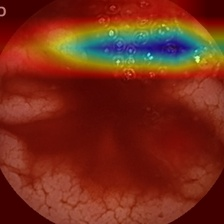

A0365.jpg 
 


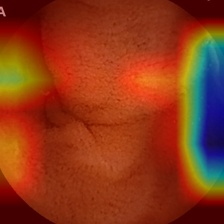

A0116.jpg 
 


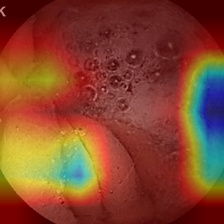

A0510.jpg 
 


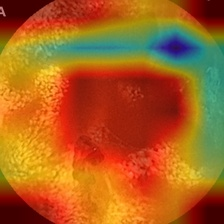

A0145.jpg 
 


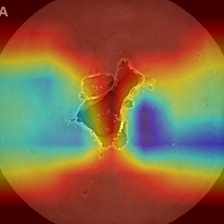

A0071.jpg 
 


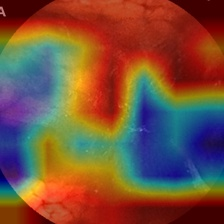

A0182.jpg 
 


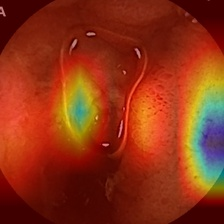

A0229.jpg 
 


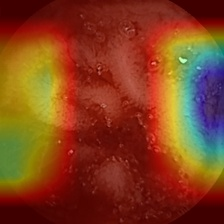

A0407.jpg 
 


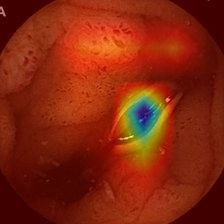

A0235_png.jpg 
 


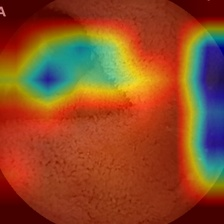

A0088.jpg 
 


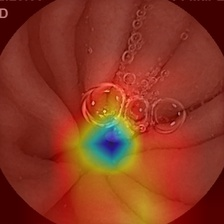

A0414.jpg 
 


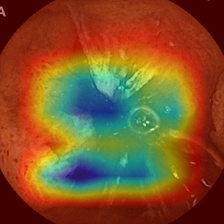

A0238.jpg 
 


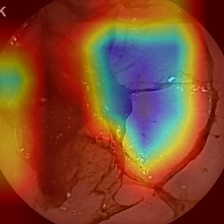

A0505.jpg 
 


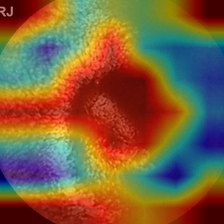

A0472_png.jpg 
 


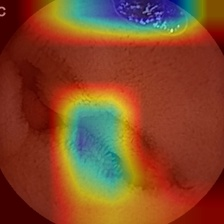

A0326.jpg 
 


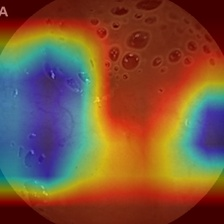

A0075.jpg 
 


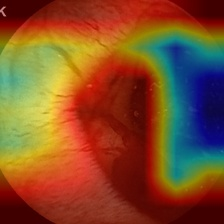

A0499.jpg 
 


In [70]:
for image_path in glob.glob(f'{output_folder}/*.jpg')[:50]:
      display(Image(filename=image_path, width=200))
      # Extract and print the image name
      image_name = os.path.basename(image_path)
      print(f"{image_name} \n ")